**Library**

In [ ]:
import pandas as pd

from sklearn.preprocessing import OneHotEncoder
import numpy as np


import matplotlib.pyplot as plt

# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier

# This module lets us save our models once we fit them.
import pickle
from sklearn import set_config
from sklearn.model_selection import RandomizedSearchCV

set_config(transform_output="pandas")

**Read the data**

In [ ]:
url = "https://drive.google.com/file/d/1mhHhZG2CffKzYboT-_O4pZ3ErROxcbXt/view?usp=drive_link"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = df = pd.read_csv(path)

In [ ]:
data.head(5)

,cap.shape,cap.color,bruises,stalk.color.above.ring,stalk.color.below.ring,population,Id,poisonous
0,k,e,False,w,w,v,6573,1
1,f,e,True,p,w,y,4426,0
2,b,w,False,w,w,s,7018,0
3,k,g,False,w,w,n,5789,0
4,f,n,True,p,g,v,6187,0


In [ ]:
 duplicate = data.duplicated().sum()
 duplicate

0

In [ ]:
data

,cap.shape,cap.color,bruises,stalk.color.above.ring,stalk.color.below.ring,population,Id,poisonous
0,k,e,False,w,w,v,6573,1
1,f,e,True,p,w,y,4426,0
2,b,w,False,w,w,s,7018,0
3,k,g,False,w,w,n,5789,0
4,f,n,True,p,g,v,6187,0
...,...,...,...,...,...,...,...,...
6494,f,g,False,b,b,v,7002,1
6495,k,e,False,p,p,v,7323,1
6496,f,g,False,n,b,y,6206,1
6497,f,n,True,w,w,s,4658,0


In [ ]:
data= data.drop(['Id'],axis=1)

In [ ]:
df.duplicated().sum()

0

In [ ]:
data = pd.get_dummies(data, drop_first=True)

In [ ]:
df.columns

Index(['cap.shape', 'cap.color', 'bruises', 'stalk.color.above.ring',
       'stalk.color.below.ring', 'population', 'Id', 'poisonous'],
      dtype='object')

In [ ]:
y=data.pop('poisonous')
X=data

In [ ]:
y.value_counts()

0    3342
1    3157
Name: poisonous, dtype: int64

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   bruises                   6499 non-null   bool 
 1   cap.shape_c               6499 non-null   uint8
 2   cap.shape_f               6499 non-null   uint8
 3   cap.shape_k               6499 non-null   uint8
 4   cap.shape_s               6499 non-null   uint8
 5   cap.shape_x               6499 non-null   uint8
 6   cap.color_c               6499 non-null   uint8
 7   cap.color_e               6499 non-null   uint8
 8   cap.color_g               6499 non-null   uint8
 9   cap.color_n               6499 non-null   uint8
 10  cap.color_p               6499 non-null   uint8
 11  cap.color_r               6499 non-null   uint8
 12  cap.color_u               6499 non-null   uint8
 13  cap.color_w               6499 non-null   uint8
 14  cap.color_y               6499 non-null 

In [ ]:
X.isna().sum()

bruises                     0
cap.shape_c                 0
cap.shape_f                 0
cap.shape_k                 0
cap.shape_s                 0
cap.shape_x                 0
cap.color_c                 0
cap.color_e                 0
cap.color_g                 0
cap.color_n                 0
cap.color_p                 0
cap.color_r                 0
cap.color_u                 0
cap.color_w                 0
cap.color_y                 0
stalk.color.above.ring_c    0
stalk.color.above.ring_e    0
stalk.color.above.ring_g    0
stalk.color.above.ring_n    0
stalk.color.above.ring_o    0
stalk.color.above.ring_p    0
stalk.color.above.ring_w    0
stalk.color.above.ring_y    0
stalk.color.below.ring_c    0
stalk.color.below.ring_e    0
stalk.color.below.ring_g    0
stalk.color.below.ring_n    0
stalk.color.below.ring_o    0
stalk.color.below.ring_p    0
stalk.color.below.ring_w    0
stalk.color.below.ring_y    0
population_c                0
population_n                0
population

**Data Split**

In [40]:
# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
X_train.head(5)

,bruises,cap.shape_c,cap.shape_f,cap.shape_k,cap.shape_s,cap.shape_x,cap.color_c,cap.color_e,cap.color_g,cap.color_n,cap.color_p,cap.color_r,cap.color_u,cap.color_w,cap.color_y,stalk.color.above.ring_c,stalk.color.above.ring_e,stalk.color.above.ring_g,stalk.color.above.ring_n,stalk.color.above.ring_o,stalk.color.above.ring_p,stalk.color.above.ring_w,stalk.color.above.ring_y,stalk.color.below.ring_c,stalk.color.below.ring_e,stalk.color.below.ring_g,stalk.color.below.ring_n,stalk.color.below.ring_o,stalk.color.below.ring_p,stalk.color.below.ring_w,stalk.color.below.ring_y,population_c,population_n,population_s,population_v,population_y
198,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4637,True,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3019,True,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2468,False,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6225,True,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [ ]:
data.corrwith(y_train).sort_values(ascending=False).head()

population_v                0.437842
stalk.color.above.ring_p    0.232833
stalk.color.above.ring_n    0.227749
stalk.color.below.ring_p    0.222522
stalk.color.below.ring_n    0.195023
dtype: float64

**Modle**

In [ ]:
rf = RandomForestClassifier(random_state=123)

In [ ]:
cv_params = {'max_depth': [2,3,4,5, None],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'max_features': [2,3,4],
             'n_estimators': [75, 100, 125, 150]
             }

In [ ]:
#scoring = {'accuracy', 'precision', 'recall', 'f1'}

In [ ]:
scoring = 'recall'

In [ ]:

rf_cv = RandomizedSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall', n_iter = 50, random_state=123)

In [ ]:
rf_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
                   n_iter=50,
                   param_distributions={'max_depth': [2, 3, 4, 5, None],
                                        'max_features': [2, 3, 4],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': [75, 100, 125, 150]},
                   random_state=123, refit='recall', scoring='recall')

In [ ]:
rf_cv.best_params_

{'n_estimators': 75,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 4,
 'max_depth': None}

In [ ]:
rf_cv.best_score_

0.9640034438226431

In [ ]:
print("Best Avg. Validation Score: ", "%.4f" % rf_cv.best_score_)

Best Avg. Validation Score:  0.9640


In [ ]:
accuracy_score(rf_cv.predict(X_train), y_train).round(2)

0.96

In [ ]:
accuracy_score(rf_cv.predict(X_test), y_test).round(2)

0.96

**Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling for KNN
    ('knn', KNeighborsClassifier())  # KNN classifier
])

In [ ]:
knn_param_grid = {
    'knn__n_neighbors': [5, 10, 15, 20],  # Vary the number of neighbors
    'knn__weights': ['uniform', 'distance'],  # Weighting strategy
    'knn__p': [1, 2]  # Minkowski distance metric (1 for Manhattan, 2 for Euclidean)
}

In [ ]:
knn_grid_search = GridSearchCV(pipeline, knn_param_grid, cv=5, scoring='recall')

In [ ]:
knn_grid_search.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [5, 10, 15, 20], 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='recall')

In [ ]:
# Print the best hyperparameters and corresponding accuracy
# Print the best hyperparameters and corresponding accuracy
best_params = knn_grid_search.best_params_
best_accuracy = knn_grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

Best Hyperparameters: {'knn__n_neighbors': 15, 'knn__p': 2, 'knn__weights': 'distance'}
Best Accuracy: 0.9591340849365082


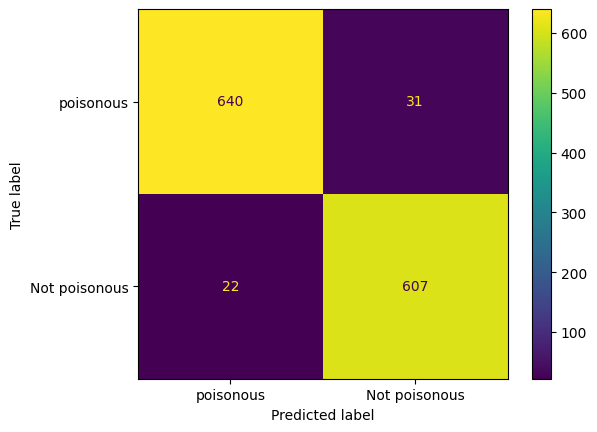

In [ ]:
ConfusionMatrixDisplay.from_estimator(knn_grid_search,
                                      X_test,
                                      y_test,
                                      display_labels=['poisonous', 'Not poisonous']);

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score


In [ ]:
y_pred_prob = rf_cv.predict_proba(X_test)[:, 1]  # Probability of the positive class
y_pred_prob

array([1., 0., 0., ..., 1., 1., 1.])

In [ ]:
print(len(y_test))  # Check the length of y
print(len(y_pred_prob))  # Check the length of y_pred_prob


1300
1300


In [41]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)


In [48]:
thresholds

array([2.        , 1.        , 0.98333333, 0.97333333, 0.95206349,
       0.94514045, 0.92444444, 0.90614846, 0.89679329, 0.87753343,
       0.7840958 , 0.74421795, 0.7139651 , 0.62665983, 0.61888889,
       0.58216758, 0.5744127 , 0.55600763, 0.53106911, 0.50767116,
       0.49294992, 0.4408133 , 0.29810149, 0.24961274, 0.24855343,
       0.02666667, 0.02114453, 0.02      , 0.00888889, 0.00666667,
       0.00611111, 0.00444444, 0.        ])

In [49]:
tpr

array([0.        , 0.82511924, 0.82829889, 0.83465819, 0.83624801,
       0.84737679, 0.84896661, 0.85532591, 0.87440382, 0.88235294,
       0.90461049, 0.91255962, 0.92209857, 0.94117647, 0.9427663 ,
       0.9491256 , 0.95071542, 0.96025437, 0.96343402, 0.97615262,
       0.9872814 , 0.98887122, 0.98887122, 0.99205087, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])

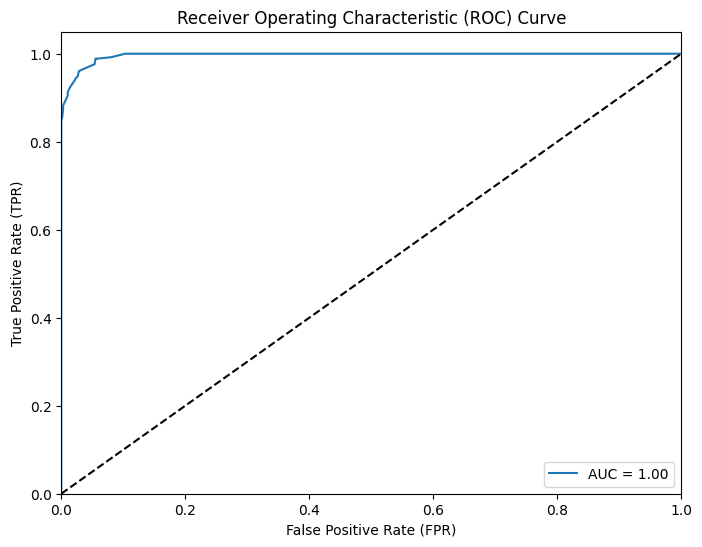

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [83]:
# Assuming you have model predictions in y_pred_prob
new_threshold_1 = 0.00611111 # Adjust this threshold as needed
y_pred = (y_pred_prob >= new_threshold_1).astype(int)
from sklearn.metrics import confusion_matrix

# Assuming you have the true labels (y_true) and adjusted predictions (y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[582  89]
 [  0 629]]


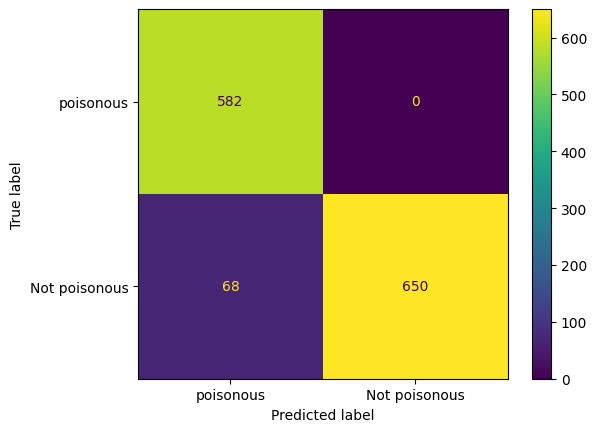

In [84]:
ConfusionMatrixDisplay.from_estimator(rf_cv,
                                      X_test,
                                      y_pred,
                                      display_labels=['poisonous', 'Not poisonous']);

**import the test data**

In [53]:
url = "https://drive.google.com/file/d/1fTPPjh_Z3PgevSE2-EFKGGV0Q1uJfP5T/view?usp=drive_link"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
new_data = pd.read_csv(path)

In [54]:
new_data.shape

(1625, 7)

In [55]:
data.shape

(6499, 36)

In [56]:
new_data = pd.get_dummies(new_data, drop_first=True)

In [57]:
new_data.shape

(1625, 37)

In [58]:
id_col = new_data.pop('Id')

In [59]:
poisonous = rf_cv.best_estimator_.predict_proba(new_data)

In [85]:
y_pred_test = (poisonous >= new_threshold_1).astype(int)

In [86]:
y_pred_test

array([[1, 1],
       [0, 1],
       [1, 0],
       ...,
       [0, 1],
       [1, 0],
       [0, 1]])

In [87]:
submission_file = pd.DataFrame({
    'Id':id_col,
    'poisonous':y_pred_test[:,1]
})

In [88]:
submission_file.head()

,Id,poisonous
0,5165,1
1,4281,1
2,231,0
3,3890,0
4,1521,1


In [89]:
from google.colab import files
submission_file.to_csv('submission_Menna.csv',index=False)
files.download('submission_Menna.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>